<h2>🚩Введение</h2>

✅Цель этой серии ноутбуков упорядочить базовую теорию машинного обучения в некий интерактивный конспект.<br>
Эта часть будет посвященна задаче регрессии и ее функционалам ошибок и линейной регрессии.<br>
Также обсудим некоторую общую теорию. 

<b>Целью машинного обучения</b> является восстановление сложных функциональных зависимостей при помощи большого(конечного) объема данных.<br>
В машинном обучении:<br>
<ul>
    <li><b>Целевая переменная</b> - значения, которые мы хотим предсказывать.</li>
    <li><b>Объект</b> - то, для чего мы будем делать предсказание(какой-то один пример из данных).</li>
    <li><b>Признаки</b> - характеристики объекта. Могут быть категориальными, числовыми, номинативными, ранговыми и другими.</li>
    <li><b>Модель</b> - то, что делает предсказание для объектов. Иными словами это то, что переводит множество объектов в множество ответов.</li>
    <li><b>Функционал ошибки</b> - то, с помощью чего оценивается качество работы модели.</li>
</ul>

<b>Основными задачами машинного обучения являются:</b><br>
<ul>
    <li><b>Регрессия</b> - предсказание вещественного числа. Например, цены дома или прочитанного процента книги. Множество ответов моделей - вещественные числа.</li>
    <li><b>Бинарная классификаци</b> - решает задачу разделения объектов на два класса - 0 и 1. Примером может быть задача разделения грибов на съедобные и ядовитые. Множество ответов модели - (0, 1).</li>
    <li><b>Многоклассовая классификация</b> - решает задачу разделения объектов более, чем на два класса. Например, классификация животных по биологическому виду. Множество ответов модели - непересекающиеся метки классов.</li>
    <li><b>Multi-labled classification</b> - решает задачу классификации, когда у целевой переменной может быть несколько классов. Например, фильм может иметь несколько жанров. Множеств ответов - пересекающиеся классы.</li>
    <li><b>Кластеризация</b> - задача группировки объектов на основе общих свойств. Примером может быть группировка пользователей онлайн кинотеатра по любимым жанрам.</li>
</ul>

<b>Виды обучения:</b><br>
<ul>
    <li><b>Обучение с учителем</b> - известны истинные значения целевой переменной, при помощи которых можно судить о качестве работы модели и делать на основе этого доработки.</li>
    <li><b>Обучение без учителя</b> - неизвестны истинные значения целевой переменной. Часто встречается в задаче кластеризации.</li>
    <li><b>Обучение с подкреплением</b> - неизвестны истинные значения целевой переменной. Данные для корректировки поведения модели получаются из окружающей среды(среды обучения).</li>
</ul>

<h2>🚩Функционал ошибки</h2>

<b>Функцией потерь</b> называется функция, которая позволяет оценить разницу между ответом модели на объекте и истинным значением целевой переменной на этом объекте. На языке математики ее можно описать так:<br>
$L(a(x_i), y_i)$<br>
Где $a(x_i)$ - предсказание модели для i-го объекта, $y_i$ - истинное значение целевой переменной для i-го объекта.

<b>Функционалом ошибки</b> называется мера качества работы модели на всей выборке, а не на каком-то одном объекте. Записать это можно следующим образом:<br>
$Q(a, X)=\frac{1}{l}\sum_{i=1}^{l}L(a(x_i), y_i)$<br>
где X - вся выборка.<br>
Функционал ошибки мы хотим свести к минимуму:<br>
$Q(a, X)\longrightarrow min_{a\in A}$<br>
где $A$ - множество всех ответов модели.

По сути задача машинного обучения состоит из следующих этапов:<br>
<ul>
    <li>Подготовка данных</li>
    <li>Выбор модели</li>
    <li>Выбор функционала ошибки</li>
    <li>Выбор способа оптимизации модели и минимизации функционала ошибки</li>
</ul>

<h2>🚩Функции потерь для задачи регрессии</h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from typing import Union

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

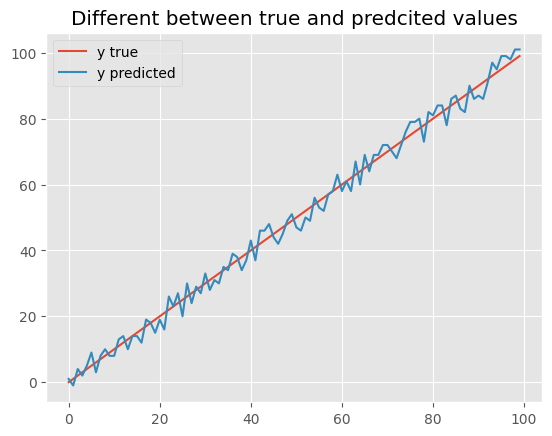

In [4]:
np.random.seed(42)

y_true = np.arange(100)
y_pred = np.array([i + np.random.randint(-5, 5) for i in y_true])

x = np.arange(100)

plt.style.use('ggplot')
plt.plot(x, y_true, label='y true')
plt.plot(x, y_pred, label='y predicted')
plt.title('Different between true and predcited values')
plt.legend(loc='best')
plt.show()

✅<b>MAE</b> - Mean Absolute Error - средняя абсолютная ошибка. Устойчива к выбросам, но не дифференцируема, особенно в 0.<br>
Определяется так:<br>
$L(y, a)=\left| {a-y} \right|$<br>
$MAE(a, X)=\frac{1}{l}\sum_{i=1}^{l}\left| {y_i - a(x_i)} \right|$

In [5]:
def mae(y_true: Union[np.array, pd.Series], y_pred: Union[np.array, pd.Series]) -> float:
    return np.mean(abs(y_pred - y_true))

In [6]:
mae(y_true, y_pred)

2.51

In [7]:
mean_absolute_error(y_true, y_pred)

2.51

✅<b>MSE</b> - Mean Squared Error - средняя квадратичная ошибка. Везде дифференцируема, но сильно реагирует на выборосы.<br>
Определяется так:<br>
$L(y, a)=(a-y)^2$<br>
$MSE(a, X)=\frac{1}{l}\sum_{i=1}^{l}(a(x_i)-y_i)^2$<br>

In [8]:
def mse(y_true: Union[np.array, pd.Series], y_pred: Union[np.array, pd.Series]) -> float:
    return np.mean((y_pred - y_true) ** 2)

In [9]:
mse(y_true, y_pred)

8.17

In [10]:
mean_squared_error(y_true, y_pred)

8.17

✅<b>Коэффициент детерминации(R2-score)</b> - показывает, какая доля дисперсии в зависимой переменной объясняется нашей моделью. Если он близок к 1, то модель хорошая. Если же он близок к 0 или отрицателен, то модель плохая. Определяется как:<br>
$R^2(a,X)=1-\frac{\sum_{i=1}^{l}(a(x_i)-y_i)^2}{\sum_{i=1}^{l}(y_i-\bar{y})^2}$<br>
$\bar{y}=\frac{1}{l}\sum_{i=1}^{l}y_i$

In [11]:
def r2(y_true: Union[np.array, pd.Series], y_pred: Union[np.array, pd.Series]) -> float:
    return 1 - sum((y_pred - y_true) ** 2) / sum((y_true - np.mean(y_true)) ** 2)

In [12]:
r2(y_true, y_pred)

0.9901950195019502

In [13]:
r2_score(y_true, y_pred)

0.9901950195019502

✅<b>Другие функционалы ошибок:</b>
<ul>
    <li><b>RMSE</b> - Root Mean Squared Error - корень из MSE. Все те же плюсы и минусы, только он лучше интерпретируется.<br>
    $L(y, a)=\sqrt{(a-y)^2}$<br>
$MSE(a, X)=\sqrt{\frac{1}{l}\sum_{i=1}^{l}(a(x_i)-y_i)^2}$<br>
    </li>
    <li><b>MAPE</b> - Mean Absolute Percentage Error - процентная абсолютная ошибка. Проще интерпретируется.<br>
    $MAPE(a, X)=\frac{1}{l}\sum_{i=1}^{l}\frac{\left| {y_i - a(x_i)} \right|}{\left| y_i \right|}$
    </li>
    <li><b>Huber Loss</b> - функция потерь Хубера. Объединяет в себе плюсы MSE и MAE(устойчива к выбросам и дифференцируема). $\delta$ регулирует то, что считается за выбросы. Из минусов - ее вторая производная имеет разрывы.<br>
    $L_\delta(y,a)=\left\{ \begin{array}{cl}
    \frac{1}{2}(y-a)^2, & \left| y - a \right|<\delta \\
    \delta(\left| y - a \right|-\frac{1}{2}\delta), & \left| y - a \right| \ge \delta
    \end{array} \right.$
    </li>
    <li><b>Log-cosh</b> - обладает всеми свойствами Huber Loss - на выбросах - линейное поведение, около нуля - квадратичное. В отличии от Хубера вторая производная не имеет разрывов.<br>
    $L(y, a)=log(cosh(a-y))$
    </li>
    <li><b>MSLE</b> - Mean Squared Logarithm Error - среднеквадратическая логарифмическая ошибка. Подходит, когда неотрицательны целевая переменная и прогнозы модели. Штрафует за отклонение в порядке величин. Из минусов - заниженные прогнозы штрафует сильнее, чем завышенные(свойство логарифмов). Задается так:<br>
    $L(y, a)=(log(a + 1)-log(y+1))^2$
    </li>
    <li><b>SMAPE</b> - Symetric Mean Absolute Percentage Error - симметрическая модификация MAPE. В отличии от нее она ограничена сверху. Вводится так:
    <br>
    $SMAPE(a, X)=\frac{1}{l}\sum_{i=1}^{l}\frac{\left| {y_i-a(x_i)} \right|}{(\left| y_i \right|+ \left| a(x_i) \right|)/2}$
    </li>
</ul>

<b>🤔Как правильно выбрать функцию потерь?</b>
<ul>
    Единного алгоритма нет, но есть несколько рекомендаций:
    <li>Смотрим на данные</li>
    <li>Определяем результат, который хотим показать</li>
    <li>Учитываем плюсы и минусы каждой из ошибок</li>
    <li>Ориентируемся на условия задачи и требования бизнеса</li>
</ul>

<h2>🚩Линейная регрессия и градиентный спуск</h2>

✅Будем использовать линейную модель(функцию) для предсказания целевой переменной. Ее можно записать следующим образом:<br>
$a(x)=w_0+w_1x_1+w_2x_2+....+w_dx_d=w_0+\sum_{j=1}^{d}w_jx_j$<br>
Где:<br>
<ul>
    <li>$w_j$ - веса(параметры) модели</li>
    <li>$w_0$ - свободный коэффициент(сдвиг)(носит регулировочный характер)</li>
    <li>$x_j$ - признаки модели(фичи)</li>
</ul>

✅Линейные модели, да и не только, принимают на вход только числовые признаки. Категориальные же нужно каким-либо образом свести к числовым перед подачей их модели. Например, можно воспользоваться One-Hot кодированием. Оно заменит множество категориального признака на m бинарных признаков. 1 будет значить, что объект принадлежит к категории. Пример:

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
data = {
    'Team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'], 
    'Points': [25, 12, 15, 14, 19, 23, 25, 29]
}

ohe_data = pd.DataFrame(data=data)

In [16]:
ohe_data

,Team,Points
0,A,25
1,A,12
2,B,15
3,B,14
4,B,19
5,B,23
6,C,25
7,C,29


In [17]:
# drop='first' - для предотвращения многоколлинеарности
ohe = OneHotEncoder(drop='first')
ohe.fit(ohe_data)
coded = ohe.transform(ohe_data)
ohe.get_feature_names_out()

array(['Team_B', 'Team_C', 'Points_14', 'Points_15', 'Points_19',
       'Points_23', 'Points_25', 'Points_29'], dtype=object)

In [18]:
coded = pd.DataFrame(coded.toarray(), columns=ohe.get_feature_names_out())
coded # заметим, что были исключены первая команда и первое кол-во очков

,Team_B,Team_C,Points_14,Points_15,Points_19,Points_23,Points_25,Points_29
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


✅Теперь перейдем к обучению линейной регрессии. Для этого сначала перепишем ее в матричном виде:<br>
$w_0+\sum_{j=1}^{d}w_jx_j\sim \begin{pmatrix}w_0 \\w_0 \\. \\. \\w_0\end{pmatrix}+\begin{pmatrix}x_{11} & x_{12} & . & . & x_{1d} \\x_{21} & x_{22} & . & . & x_{2d} \\. & . & . & . & . \\. & . & . & . & . \\x_{l1} & x_{l2} & . & . & x_{ld} \\\end{pmatrix}\cdot\begin{pmatrix}w_1 \\w_2 \\. \\. \\w_d\\ \end{pmatrix}=\begin{pmatrix} \sum_{i=1}^{d}x_{1i}w_i\\ \sum_{i=1}^{d}x_{2i}w_i\\.\\ .\\ \sum_{i=1}^{d}x_{li}w_i\\\end{pmatrix}+\begin{pmatrix}w_0 \\w_0 \\. \\. \\w_0\end{pmatrix}$<br>
Запишем также в матричном виде MSE и получившуюся оптимизационную задачу:<br>
$\frac{1}{l}\left\| Xw-y \right\|^2\longrightarrow min$<br>
Продифференцируем функционал и найдем оптимальное значение весов аналитически:<br>
$w=(X^TX)^{-1}X^Ty$<br>
Такое аналитическое решение нам не подходит, так как матрица $(X^TX)$ может быть вырожденной, да и вообще обращение матрицы - операция кубической сложности.

✅На помощь приходит градиент! Это общий метод, который подходит для лубого дифференцируемого функционала. В основе него лежит градиент - вектор частных производных функции:<br>
$\nabla f(x_1,...x_d)=(\frac{\partial f}{\partial x_j})^{d}_{j=1}$<br>
Градиент является направлением наискорейшего роста функции, следовательно антиградиент - направление наискорейшего убывания функции. То, что нам и нужно, чтобы прийти в минимум.

<ol>
<b>📉Алгоритм градиентоного спуска:</b>
    <li>Стартуем из случайной точки</li>
    <li>Считаем градиент и двигаемся по антиградиенту</li>
    <li>Повторяем, пока не придем к минимуму</li>
</ol>
Запись в виде формулы:<br>
$w^{(k)}=w^{(k-1)}\cdot\eta_{k} \nabla_{w}Q(w^{(k-1)})$<br>
Где:<br>
$\nabla_{w}Q(w)$ - градиент $Q$ по $w$<br>
$\eta_{k}$ - скорость спуска<br>
Про сходимость - для линейных моделей она гарантирована(точка <b>глобального</b> минимума одна). Если же попадаем в <b>локальный</b> минимум, то можем воспользоваться стратегией мульти старта - начинать из разных точек.

<b>Модификации.</b><br>
Алгоритм, описанный выше, является классическим, полным градиентным спуском. Он честно считает градиент для всей обучающей выборки. На практике это бывает долго. Поэтому используются следующие улучшения оценки:<br>
<ul>
    <li><b>Стохастический Градиентный Спуск</b> - SGD(Stochastic Gradient Descent) - градиент всей выборки оценивается по градиенту случайно взятого слагаемого. При таком подходе мы может отдалиться от минимума, даже оказавшись около него. Зато мы получаем прирост по скорости.</li>
    <li><b>Mini-Batch SGD</b> - оцениваем градиент всей выборки по градиенту случайно отобранной группы объектов. Такой подход нечто среднее между SGD и классическим спуском.</li>
</ul>

✅<b>Длина шага</b> - важный параметр. При сильно большом шаге мы рискуем пройти точку минимума, а при сильно маленьком - долго к ней идти. Хорошей стратегией является динамическое изменение шага на каждой итерации. Его величина будет зависеть от текущей итерации.

✅Градиентный спуск пора остановить, если:
<ul>
    <li>Ошибка на тестовой выборке не сильно меняется.</li>
    <li>Веса не сильно изменились на последней итерации.</li>
    <li>Не сильно менялась ошибка на обучающей выборке.</li>
</ul>

<h2>🚩Переобучение</h2>

<b>Переобучение</b> - это потеря моделью своей обобщающей способности. Иными словами, модель сильно подстраивается под обучающие данные и выдает большую ошибку на тестовых.<br>
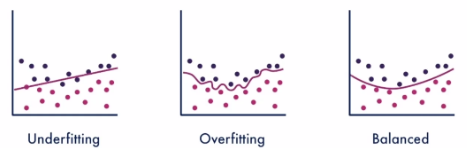

<ul>
    Как распознать переобучение?
    <li>Ошибка на тестовой выборке сильно больше, чем на обучающей.</li>
    <li>При признаках будут большие веса.</li>
</ul>

<b>✅Способы борьбы с переобучением:</b>
<ul>
    <li><b>Отложенная выборка</b> - на одной части выборки обучаем, на другой - тестируем.</li>
    <li><b>Кросс Валидация</b> - разбиваем выборку на k частей, на k-1 выборке обучаем, а на одной тестируем. И так делаем, пока каждая из частей не побывает в роли тестовой.</li>
    <li><b>Регуляризация</b> - Следит, чтобы у модели не было слишком больших весов при обучении.</li>
</ul>
Рассмотрим кросс валидацию и регуляризацию подробнее.

✅Посмотрим, как работает кросс валидация.<br>
Для начала сгенерируем наши классы/группы.

In [19]:
from matplotlib.patches import Patch

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

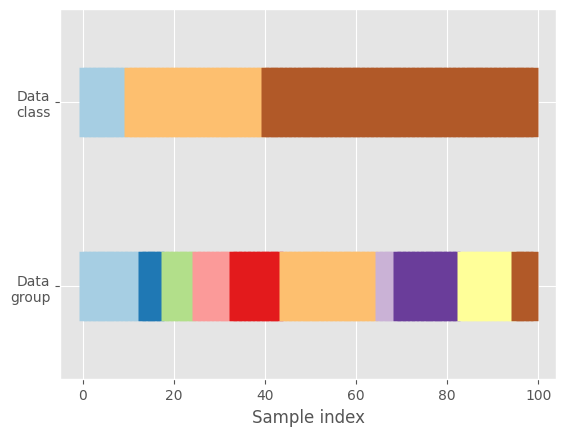

In [20]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")

In [21]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    use_groups = "Group" in type(cv).__name__
    groups = group if use_groups else None
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=groups)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

✅Посмотрим теперь на классический пример кросс валидации - случай, когда выборка делится на k частей. k-1 часть используется для обучения, а одна - для тестирования.

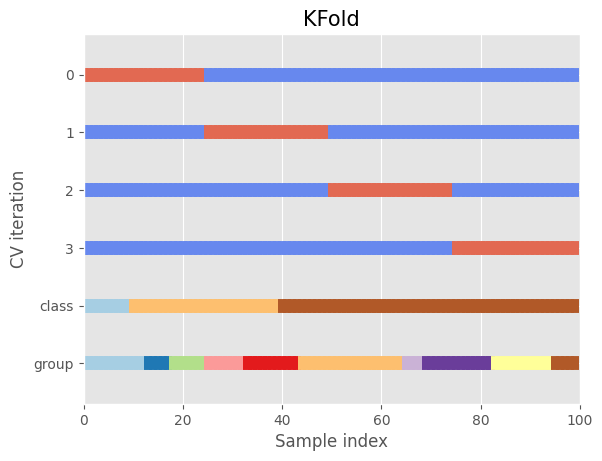

In [24]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)
plt.show()

✅Как можно видеть, по умолчанию K-Fold не принимает во внимание ни класс, ни группу точек данных. Мы можем изменить это, используя либо:
<ul>
    <li><b>StratifiedKFold</b> -  стратифицированная кросс валидация. Стратификационные выборки используются для того, чтобы сохранять исходное соотношение <i>классов</i>. Полезно при дисбалансе. Для начала вся выборка разбивается на страты с "равной" долей объектов каждого класса в каждой страте, а после уже из страт и набираются выборки.</li>
    <li><b>GroupKFold</b> - смотрим, чтобы одна и та же группа попадала в выборку лишь один раз. Иными словами, мы хотим, чтобы одна и та же группа не оказалась в двух разных выборках.</li>
    <li><b>StratifiedGroupKFold</b> - гибрид двух выше описанных методов.</li>
</ul>

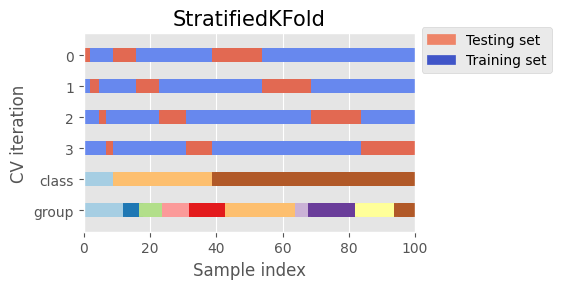

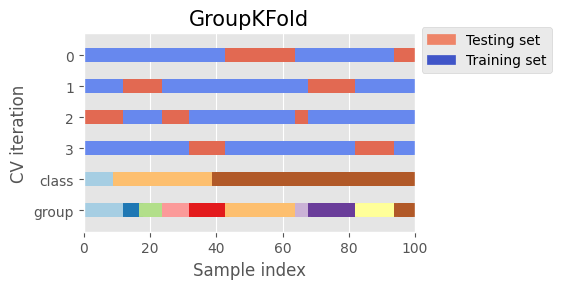

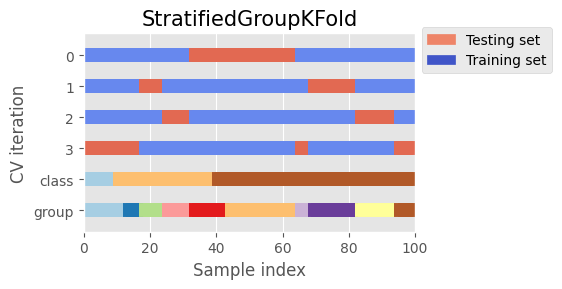

In [25]:
cvs = [StratifiedKFold, GroupKFold, StratifiedGroupKFold]

for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, groups, ax, n_splits)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)

✅Визуализируем больше подходов к кросс валидации из scikit-leanr!

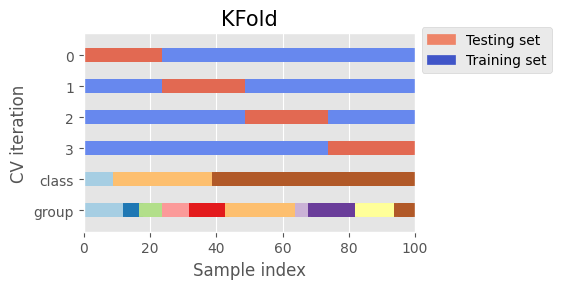

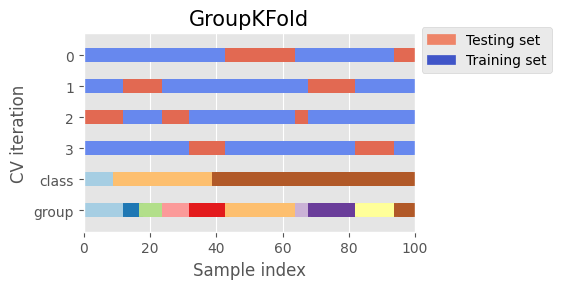

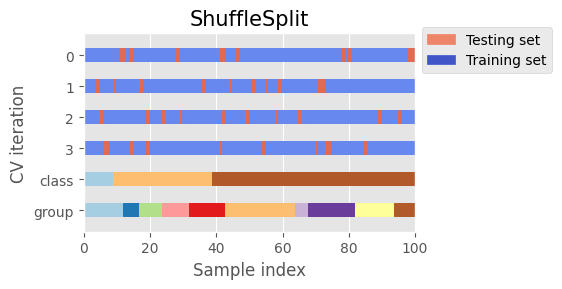

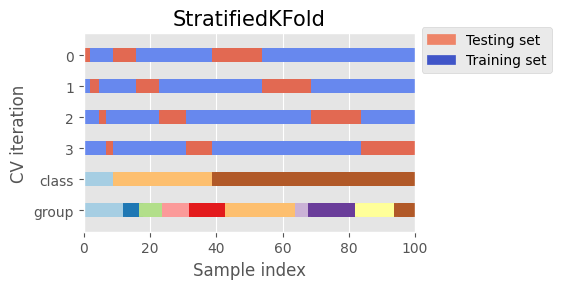

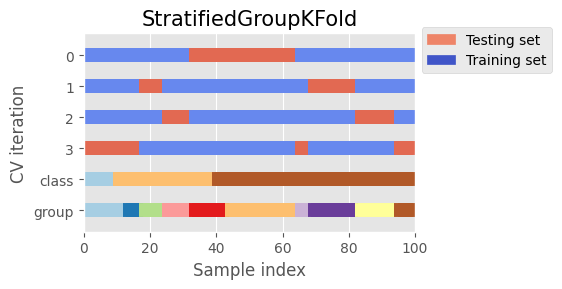

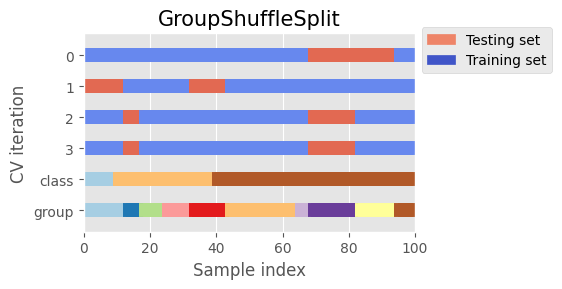

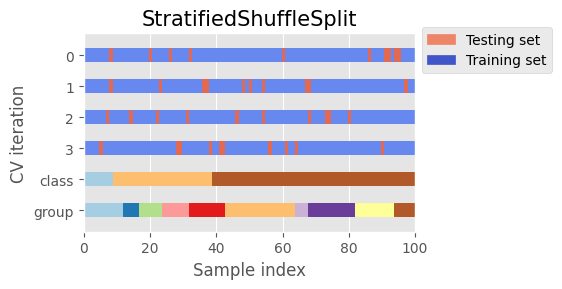

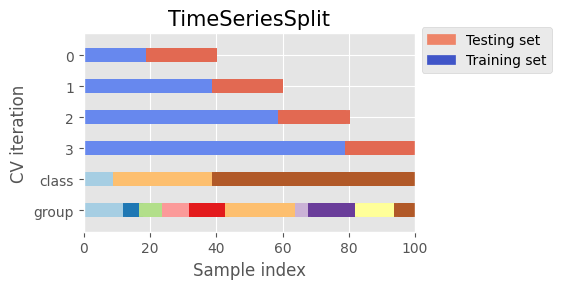

In [27]:
cvs = [
    KFold,
    GroupKFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedGroupKFold,
    GroupShuffleSplit,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()


✅<b>Как после кросс валидации построить итоговую модель?</b><br>
<ul>
    <li>Если в ходе кросс валидации не было обнаружено переобучения, то можно обучить модель на всей выборке.</li>
    <li>После того, как при помощи кросс валидации были подобранны оптимальные параметры(GridSearchCV, к примеру) мы можем либо обучить модель на всей выборке, либо обучить композицию моделей на разбитой на части выборке и усреднить их результат.</li>
</ul>

✅<b>Регуляризация</b> - один из способов борьбы с переобучением моделей. Если модель переобучилась, то у нее наверняка будут большие веса при признаках(или сильная важность фичей, что одно и то же). Регуляризация призвана штрафовать модель за большие веса. К основным видам регуляризации относятся:<br>
<ul>
    <li><b>L1 регуляризация(Lasso)</b> - добавляет к функции потерь модели штраф, равный сумме абсолютных значений коэффициентов (весов) модели. Этот подход направлен на минимизацию не только ошибки прогнозирования, но и сложности самой модели. Математически модель с L1 регуляризацией выглядит так:<br>
    $Q(w,X)+\lambda \sum_{i=1}^{d}\left| w_i \right|\longrightarrow min_{w}$ - в виде функционала ошибки(увеличивая правую часть - уменьшаем левую, то есть значения весов). $\lambda$ - сила регуляризации. Обычно подбирается через кросс валидацию.<br>
    $a(x)=w_0+\sum_{i=1}^{d}w_ix_i$ - в случае с линейной моделью мы должны оставлять свободный коэффициент неизменным, дабы модель сохраняла порядок в своих предсказаниях. Важным свойством L1 регуляризации является отбор признаков - она способна занулить малозначащие признаки, сделав веса при них равными нулю. Это свойство часто используется на практике.
    </li>
    <li><b>L2 регуляризация(Ridge)</b> - к функции потерь добавляется штраф, пропорциональный квадрату величины весов модели. Это заставляет модель не только минимизировать ошибку на обучающих данных, но и сохранять веса как можно меньшими. Математическая запись:<br>
    $Q(w,X)+\lambda \sum_{i=1}^{d}w_i^2\longrightarrow min_{w}$<br>
    </li>
    <li><b>Elastic Net</b> - совмещает в себе L1 и L2 регуляризации, каждая из которых идет со своим параметром $\lambda$.<br>
    $Q(w,X) +\lambda_1 \sum_{i=1}^{d}\left| w_i \right| + \lambda_2 \sum_{i=1}^{d}w_i^2\longrightarrow min_{w}$
    </li>
</ul>

Графически геруляризация выглядит так:<br>
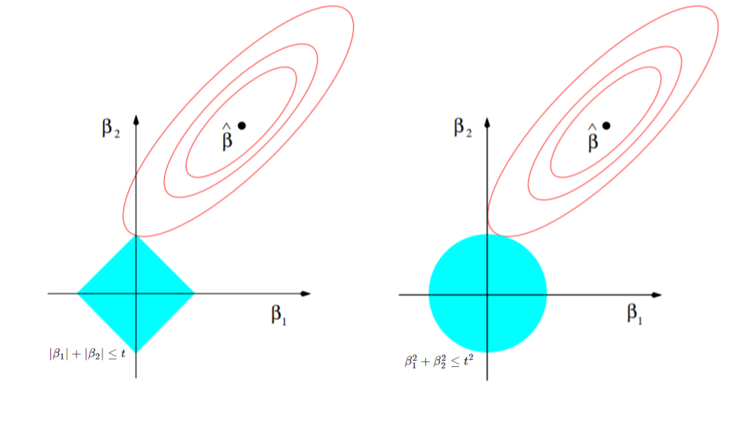<br>
Сравнение лассо (слева) и гребневой (справа) регрессий, пример для двумерного пространства независимых переменных.
Бирюзовые области изображают ограничения на коэффициенты β, эллипсы — некоторые значения функции наименьшей квадратичной ошибки(градиентные линии оптимального решения без регуляризации. Точка - оптимальное решение).

Elastic Net:<br>
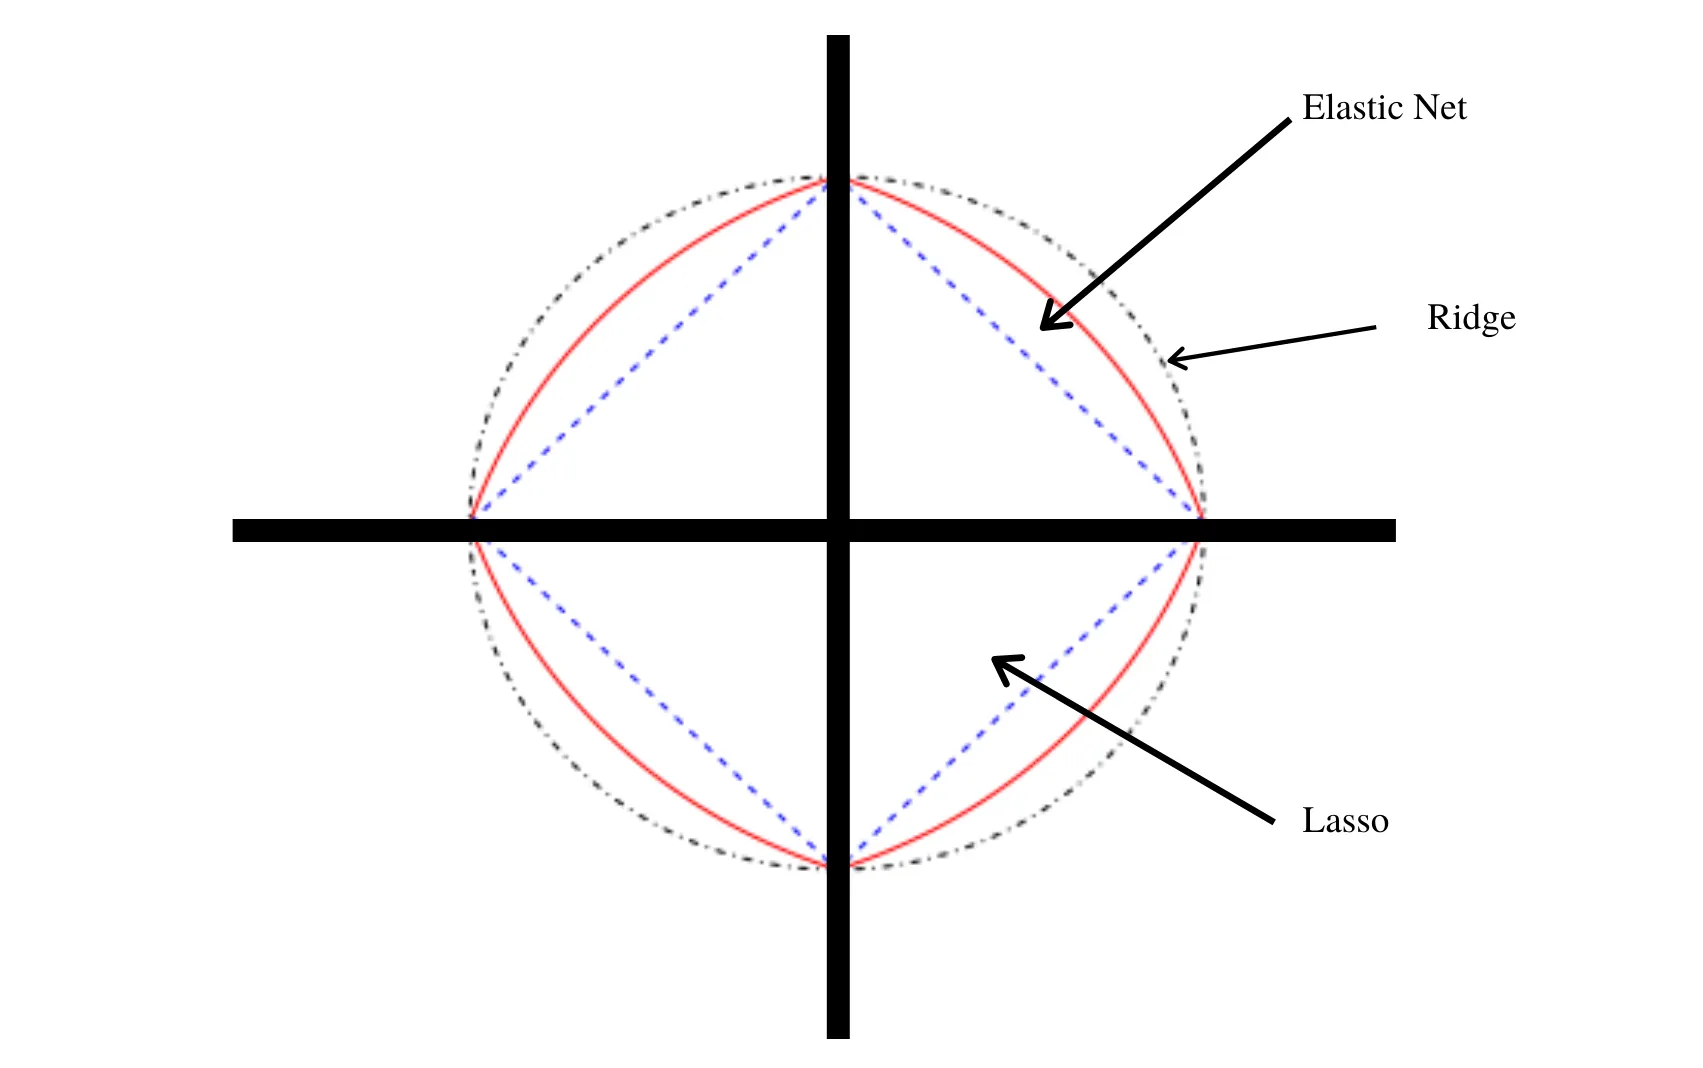